In [1]:
import requests

In [2]:
requests?

In [15]:
# Make sure the app is running in a terminal. 
# Start it with: python app.py 
app = 'http://localhost:8080'
endpoint = app + '/users'

## Requests with python

- Look at all of the methods: get, post, put and delete
- Look at the response object
    - Get status code
    - Get the data from the response object
    


### Get

In [11]:
r = requests.post(url='http://www.google.com')
# r.status_code

In [26]:
r = requests.get(url=endpoint)
r.json()


{'123456789': 'Alex',
 '789123456': 'Isabella',
 '321456978': 'Filip',
 '79812398127': 'Melina'}

### POST

- What happens if we change the data we send?

In [18]:
new_user = {'user': '79812398127',
            'name':'Melina'}


r = requests.post(url=endpoint, json=new_user)
r.status_code

422

### PUT

- This method is used to update an existing user

In [21]:
update_data = {'user_id': '321', 'name': 'Kungen'}
r = requests.put(url=endpoint, json=update_data)
r

<Response [200]>

### DELETE

In [31]:
data = {'user_id':'123456789'}
requests.delete(url=endpoint, params=data)

<Response [200]>

## Real data 

Now we will try to get real data from Isabellas boyfriend's public data API

In [27]:
import pandas as pd
r = requests.get('https://www.erikliljeroth.se/api/alldata')
r.status_code

200

In [28]:
data = r.json()
type(data)

list

In [30]:
df = pd.DataFrame(data)
df.head()

,dtg,temperature,humidity,sensor_id
0,2020-03-29 23:00:01,2.99,44.30,949044086
1,2020-03-29 23:30:02,2.49,45.72,949044086
2,2020-03-30 00:00:02,2.43,45.40,949044086
3,2020-03-30 00:30:02,2.52,48.45,949044086
4,2020-03-30 01:00:02,2.62,49.99,949044086


In [40]:
df.dtypes

temperature    float64
humidity       float64
sensor_id        int64
dtype: object

In [42]:
df  = pd.read_csv(r'C:\Users\AlexanderHagelborn\code\ec-python-course\week_3\lectures\Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [46]:
df[df['Generation'].isin([1, 2])]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


# Pandas repetition

In [56]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'C:\Users\AlexanderHagelborn\code\ec-python-course\week_3\lectures\Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Using isin() to select rows based on values in a single column

In [70]:
mask = df['Name'].isin(['Bulbasaur', 'Charmander', 'Squirtle'])
sub = df[mask][['Name', 'Attack', 'Defense', 'Speed']]
sub

,Name,Attack,Defense,Speed
0,Bulbasaur,49,49,45
4,Charmander,52,43,65
9,Squirtle,48,65,43


## Plot data comparison

         Name variable  value
0   Bulbasaur   Attack     49
1  Charmander   Attack     52
2    Squirtle   Attack     48
3   Bulbasaur  Defense     49
4  Charmander  Defense     43
5    Squirtle  Defense     65
6   Bulbasaur    Speed     45
7  Charmander    Speed     65
8    Squirtle    Speed     43


<AxesSubplot:xlabel='variable', ylabel='value'>

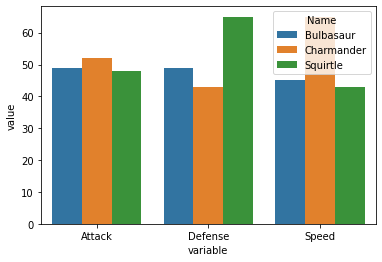

In [74]:
melt = sub.melt(id_vars='Name')
print(melt)
sns.barplot(x='variable', y = 'value', hue='Name' ,data = melt)


In [75]:
type(melt)

pandas.core.frame.DataFrame